In [1]:
from instrumentdatabaseapi import instrumentdatabaseapi as API

repo = API.Repository(local_repo=".")

In [2]:
print(repo)


URL: https://github.com/PaNOSC-ViNYL/instrument_database.git
local_dir: ./


Load the instrument configuration providing:
 - name of the institute
 - name of the instrument
 - version of the instrument description (HEAD is the most recent)
 - name of the simulation program

In [3]:
help(repo)

Help on Repository in module instrumentdatabaseapi.instrumentdatabaseapi object:

class Repository(builtins.object)
 |  :class Repository:
 |  The API to interact with the instrument database is offered by the Repository class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, url:str='https://github.com/PaNOSC-ViNYL/instrument_database.git', local_repo:str='/dev/shm/instrumentDBAPI/') -> None
 |      Initiate the repository from an URL or local repo
 |      
 |      :param url: URL of the git repository storing the instrument database
 |                  URL can be anything git can manage
 |                  git will raise an error in case URL is not accepted
 |      :param local_repo: local directory where the instrument database is copied to
 |  
 |  __repr__(self) -> str
 |      Allowes to get basic information about the repository
 |  
 |  get_flavours(self, institute:str, instrument:str, version:str, simulation_program:str) -> List[str]
 |  
 |  get_institutes(self) -> list
 

In [4]:
repo.ls_institutes()

 - test_institute
 - ILL


In [5]:
repo.ls_instruments("ILL")

Available instruments for ILL:
 -  ILL/D22
 -  ILL/ThALES


In [6]:
repo.ls_versions("ILL","ThALES")

Available versions for instrument ThALES:
 -  HEAD


In [7]:
repo.ls_simulation_programs("ILL","ThALES","HEAD")

Instrument ThALES from institute ILL is implemented with the following programs:
 -  mcstas


In [8]:
repo.ls_flavours("ILL","ThALES","HEAD","mcstas")

Available flavours for instrument ThALES:
No special flavours available
 -  .


In [9]:
myinstrument = repo.load("ILL", "ThALES", "HEAD", "mcstas", dep=False)

In [10]:
myinstrument.list_calculators()

- Instrument: ThALES -
Calculators:
ThALES



In [11]:
myThALES = myinstrument.calculators["ThALES"]
# myThALES.show_components()
print(myinstrument)

######## Instrument ThALES
- Instrument: ThALES -
Calculators:
ThALES
- ParametersCollection object -
  Master Parameters
  a2                                  79.1       [degree]                
  a3                                  0          [degree]                
  a4                                  60         [degree]                
  a6                                  74.34      [degree]                

   ThALES
    - Parameters object -
   a2                                  79.1       [degree]             Angle between beam reflected by monochromator and incident beam   L[33 degree, 128 degree]
   a3                                  0          [degree]             sample table rotation angle   
   a4                                  60         [degree]             Angle between reflected by sample and incident beams   L[-128 degree, 128 degree]
   a6                                  74.34      [degree]             Angle between reflected by analyzer and incident beams   

In [12]:
import pint
ureg = pint.get_application_registry()

a2 = myinstrument.parameters["ThALES"]["a2"]
a2.energy = 4.98 * ureg.meV

basedir = "/tmp/ThALES_scan/"
myinstrument.set_instrument_base_dir(basedir)

a4 = myinstrument.parameters["ThALES"]["a4"]
a3 = myinstrument.parameters["ThALES"]["a3"]
a3.value = 0 * ureg.degree
a4.value = 60 * ureg.degree

a6 = myinstrument.parameters["ThALES"]["a6"]

dE = 0.05
energy = 4.98

myThALES.settings(ncount=10000000)

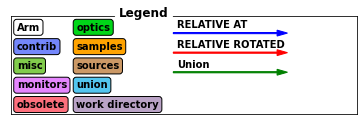

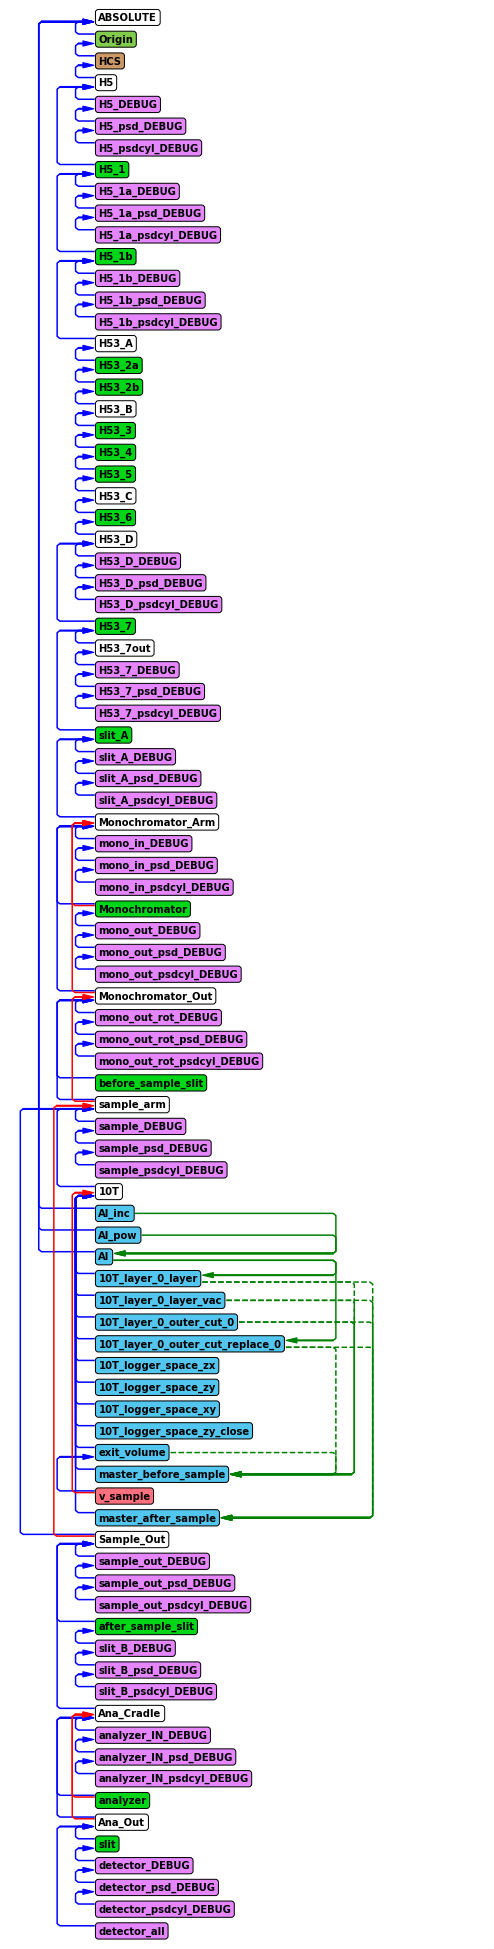

In [13]:
#myThALES.show_diagram()
myThALES.show_diagram()

In [14]:
#myThALES.show_components()

In [15]:
import mcstasscript as ms

In [16]:
a6.energy = a2.energy
a4.value = 60 * ureg.degree
#myThALES.calculator_base_dir = "/tmp/test/" 
data_empty = myThALES.backengine()
#myinstrument.run()

INFO: Using directory: "/tmp/ThALES_scan/ThALES"
INFO: Regenerating c-file: ThALES.c
CFLAGS= -I@MCCODE_LIB@/share/
INFO: Recompiling: ./ThALES.out
mccode-r.c: In function ‘sighandler’:
mccode-r.c:3719:5: warning: implicit declaration of function ‘kill’; did you mean ‘ceill’? [-Wimplicit-function-declaration]
In file included from /usr/local/mcstas/2.7/tools/Python/mcrun/../mccodelib/../../../contrib/union/Incoherent_process.comp:65:
/usr/local/mcstas/2.7/tools/Python/mcrun/../mccodelib/../../../share/Union_functions.c: In function ‘write_tagging_tree’:
/usr/local/mcstas/2.7/tools/Python/mcrun/../mccodelib/../../../share/Union_functions.c:1599:105: warning: passing argument 4 of ‘qsort’ from incompatible pointer type [-Wincompatible-pointer-types]
   qsort(total_history.saved_histories,total_history.used_elements,sizeof (struct saved_history_struct), Sample_compare_history_intensities);
                                                                                                     

In [17]:
ms.name_plot_options("10T_logger_space_zx", data_empty, log=True, orders_of_mag=4)
ms.name_plot_options("10T_logger_space_zy", data_empty, log=True, orders_of_mag=4)

In [18]:
#print(data_empty)
#for d in data_empty:
#  ms.make_sub_plot(d)


Plotting data with name sample_psd_DEBUG
Plotting data with name sample_psdcyl_DEBUG
Plotting data with name 10T_logger_space_zx
Plotting data with name 10T_logger_space_zy
Plotting data with name 10T_logger_space_xy
Plotting data with name 10T_logger_space_zy_close


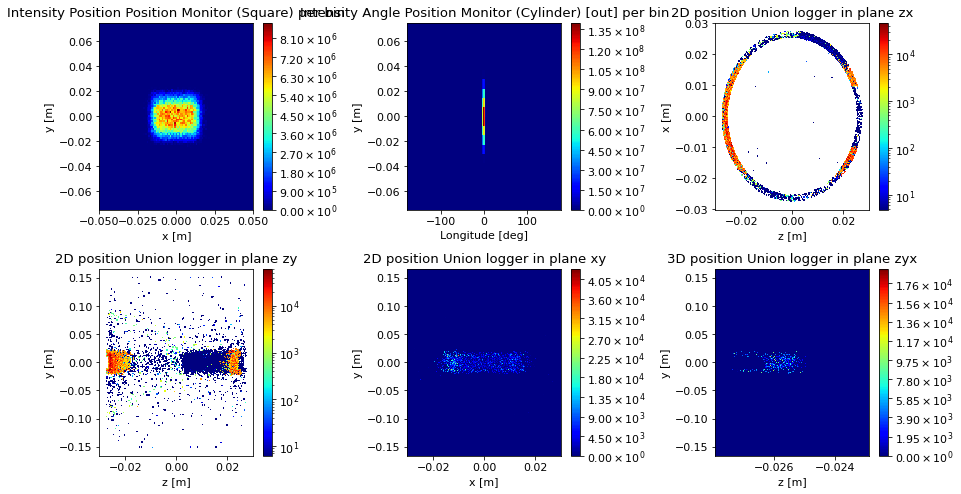

In [19]:
ms.make_sub_plot(data_empty[48:54])
#ms.make_sub_plot(data_empty[2])

Plotting data with name sample_out_DEBUG
Plotting data with name sample_out_DEBUG
Plotting data with name sample_out_psd_DEBUG
Plotting data with name sample_out_psdcyl_DEBUG


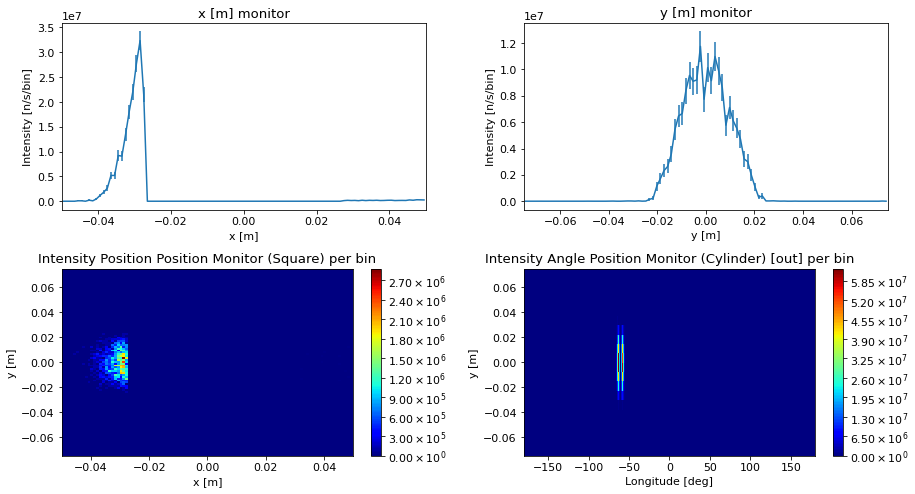

In [20]:
ms.make_sub_plot(data_empty[55:59])

Plotting data with name analyzer_IN_DEBUG
Plotting data with name analyzer_IN_DEBUG
Plotting data with name analyzer_IN_psd_DEBUG
Plotting data with name analyzer_IN_psdcyl_DEBUG


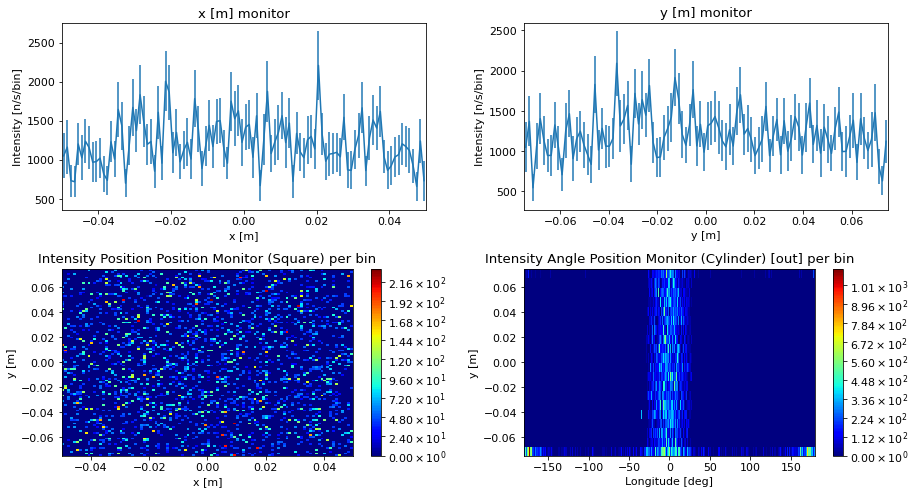

In [21]:
ms.make_sub_plot(data_empty[65:69])

AttributeError: 'Canvas' object has no attribute '_last_buff'

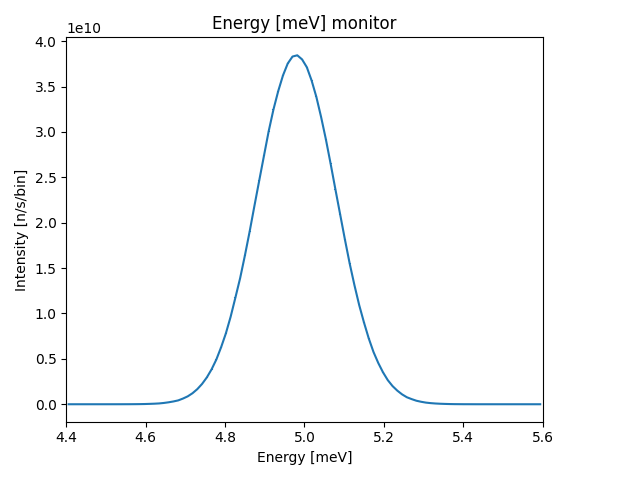

In [22]:
%matplotlib widget
import mcstasscript.jb_interface as ms_widget
ms_widget.show(data_empty)